In this notebook, I use the mean similarity score of each speech to all of the Royal Institution Christmas Lectures, calculated in the previous notebook ('project_fletcher_text_processing') as my score to assess how 'scientific' or evidence-based' each parliamentary speech is.

In [1]:
import pickle

# Load dataframe
pkl_file = open('df_similarity.pkl', 'rb')
df_similarity = pickle.load(pkl_file)

# Load sci_docs
pkl_file = open('sci_docs.pkl', 'rb')
sci_docs = pickle.load(pkl_file)

### Is there a trend towards more evidence-based debating?

#### Baseline: science words

I try a simple model comparing the speeches to a list of words associated with evidence.

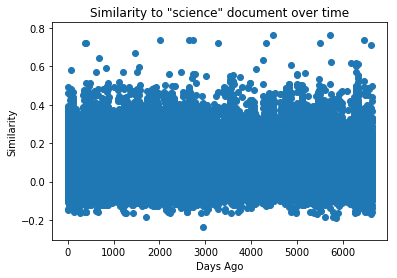

In [7]:
# Graph
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(df_similarity['days_ago'],df_similarity['science_words'])
plt.xlabel('Days Ago')
plt.ylabel('Similarity')
plt.title('Similarity to "science" document over time')
plt.show()

In [3]:
# Correlation?
from scipy.stats.stats import pearsonr 
days_ago_2 = [x for x in df_similarity['days_ago'] if str(x) != 'nan']
print(pearsonr(df_similarity['days_ago'][:(sci_docs[0]-1)],df_similarity['science_words'][:(sci_docs[0]-1)]))

(0.01295054869476057, 6.569964763133459e-32)


Text(0.5,1,'Scientificness of Debates over Time')

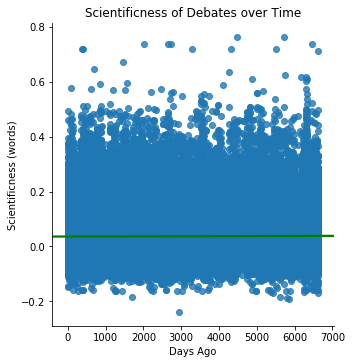

In [15]:
import seaborn as sns
g = sns.lmplot(x='days_ago',y='science_words', data = df_similarity, fit_reg = True, line_kws={'color': 'green'})
g.set_axis_labels("Days Ago","Scientificness (words)")
ax = plt.gca()
ax.set_title("Scientificness of Debates over Time")

In the scatter plot, there isn't a discernable trend as there is so much variation within one time period. However, over the time period considered (2000-2018), the correlation (and green line on the above graph) shows there is a very small decrease in the evidence-basedness of the speeches. (The x axis increases into the past - days ago).

#### Science lectures

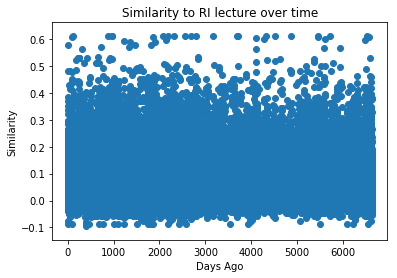

In [10]:
# Graph
plt.scatter(df_similarity['days_ago'],df_similarity['scientificness_avg'])
plt.xlabel('Days Ago')
plt.ylabel('Similarity')
plt.title('Similarity to RI lecture over time')
plt.show()

In [12]:
# Correlation?
print(pearsonr(df_similarity['days_ago'][:(sci_docs[0]-1)],df_similarity['scientificness_avg'][:(sci_docs[0]-1)]))

(0.010174548584828618, 2.5591746406596256e-20)


Text(0.5,1,'Scientificness of Debates over Time')

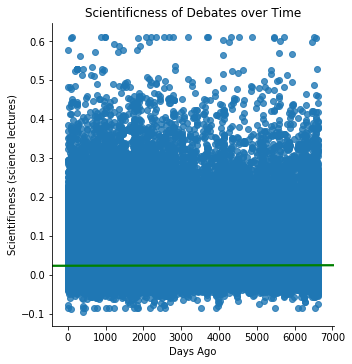

In [14]:
import seaborn as sns
g = sns.lmplot(x='days_ago',y='scientificness_avg', data = df_similarity, fit_reg = True, line_kws={'color': 'green'})
g.set_axis_labels("Days Ago","Scientificness (science lectures)")
ax = plt.gca()
ax.set_title("Scientificness of Debates over Time")

Again, the trend for similiarity with the RI Christmas lectures is very similar to very simple model of the comparison with words associated with evidence.

#### Number of digits

I also try a very simple model which counts the number of digits in a speech as a proxy for evidence-basedness. The idea behind this is that it's an attempt to at least quantify something. I need to do some further analysis on this.

In [1]:
import numpy as np
num_digits = []
for row in np.arange(0,df_similarity.shape[0]):
    num_digits.append(sum(c.isdigit() for c in df_similarity.iloc[row,2]))
df_similarity['num_digits'] = num_digits

In [18]:
df_similarity.head()

,MP,date,speech,date_1,scientificness_823978,scientificness_823979,scientificness_823980,scientificness_823981,scientificness_823982,scientificness_823983,scientificness_823984,scientificness_823985,scientificness_823986,scientificness_823987,scientificness_823988,scientificness_avg,science_words,days_ago
0,Mr. Mike Gapes,2000-11-22a,If she will make a statement on her Department...,2000-11-22 00:00:00,-0.004789,-0.001760,-0.001760,-0.004357,-0.001760,-0.005380,-0.004768,-0.002389,-0.004221,-0.006546,0.011797,-0.002358,0.011797,6315.0
1,Mr. Mike Gapes,2000-11-22a,Is my right hon. Friend aware that the biggest...,2000-11-22 00:00:00,0.013689,-0.003666,-0.003666,-0.000553,-0.003666,0.029453,-0.005128,-0.002715,-0.001255,-0.003687,-0.012271,0.000594,-0.012271,6315.0
2,The Parliamentary Under-Secretary of State for...,2000-11-22a,We have responded to a large number of floods ...,2000-11-22 00:00:00,-0.009755,0.132169,0.132169,0.118814,0.132169,0.001860,0.001552,0.002627,0.004346,0.003859,0.069159,0.053543,0.069159,6315.0
3,The Parliamentary Under-Secretary of State for...,2000-11-22a,Since 1991 we have provided £217 million in hu...,2000-11-22 00:00:00,0.016553,0.009160,0.009160,0.006392,0.009160,0.027826,0.019452,0.012899,0.010749,0.016366,0.090965,0.020789,0.090965,6315.0
4,Mr. Gapes,2000-11-22a,I am grateful for that reply. Does it not show...,2000-11-22 00:00:00,-0.023769,-0.018153,-0.018153,-0.017097,-0.018153,-0.020657,-0.014895,-0.007893,-0.008607,-0.003141,0.083085,-0.006130,0.083085,6315.0


#### MPs

I'm interested in whether particular MPs are more evidence-based than on average compared with their peers. To do so, I find the mean evidence-basedness score by MP, and conduct a t-test to compare their mean to the mean of the evidence-basedness score overall. 

In [2]:
for i, date in enumerate(df_similarity['date_1']):
    try:
        df_similarity.loc[i,'year'] = date.year 
    except(AttributeError):
        df_similarity.loc[i,'year'] = np.nan

In [26]:
print(len(df_similarity['year']))
df_similarity.shape

823989


(823989, 19)

In [3]:
from scipy import stats
sci_avg = df_similarity['scientificness_avg'][:(sci_docs[0]-1)]
#digits_avg = df_similarity['num_digits'][:(sci_docs[0]-1)]

mps_dict_sci = dict.fromkeys(df_similarity['MP'].unique(), 0)
mps_dict_ttest = dict.fromkeys(df_similarity['MP'].unique(), 0)
mps_dict_digits = dict.fromkeys(df_similarity['MP'].unique(), 0)
mps_dict_digits_ttest = dict.fromkeys(df_similarity['MP'].unique(), 0)

for mp in df_similarity['MP']:
    sci_mp = df_similarity[(df_similarity['MP'] == mp) & (df_similarity['year'] >= 2015)]['scientificness_avg']
    mps_dict_sci[mp] = sci_mp.mean()
    mps_dict_ttest[mp] = stats.ttest_ind(sci_mp,sci_avg)
    #digits_mp = df_all[(df_similarity['MP'] == mp)  & (df_similarity['year'] >= 2015)]['num_digits']
    #mps_dict_digits[mp] = sci_mp.mean()
    #mps_dict_digits_ttest[mp] = stats.ttest_ind(digits_mp,digits_avg)

In [31]:
count = 0
for mp in mps_dict_sci.keys():
    try:
        if (mps_dict_ttest[mp][1] < 0.05) and (mps_dict_sci[mp] > 0):
            print(mp)
            count+=1
    except(TypeError):
        continue
print(count)

Joan Ruddock
Hon. Members
Angela Eagle
3


There are 2 named MPs who are significantly more evidence-based than their peers (at a 5% significance level).

#### NICE and EEF

The What Works Centres (https://www.gov.uk/guidance/what-works-network) use evidence to try to improve public services in the UK. NICE is the National Institute of Clinical Excellence and was formed in 1999 - it focuses on improving healthcare. EEF is the Educational Endowment Foundation, was started in 2011 and focuses on providing evidence about what works in education. 

We can test these interventions to see whether they've improved the evidence-basedness of the arguments in parliament (not necessarily the key target audience). I do so through a difference-in-difference analysis which compares the difference in evidence-basedness of the speeches before the intervention and afterwards for that intervention area (in this case health for NICE, for example) with the difference before and after the intervention for a control area (other areas of policy which we wouldn't expect to be influenced by the establishment of NICE).

For this subsample of the speeches (2000-2018), I don't have data on pre-NICE and so I focus on EEF.

In [ ]:
# NICE speeches (1999)
NICE_speeches = []
for row, speech in enumerate(df_similarity['speech']):
    for word in ['health','NHS','clinical','hospital']:
        #print(word)
        if word in speech:
            NICE_speeches.append(row)

NICE = df_similarity.loc[NICE_speeches,:]
not_NICE = df_similarity.loc[~df_similarity.index.isin(NICE_speeches),:]

NICE_before = (NICE[(NICE['year'] >= 1994) &
                (NICE['year'] < 1999)])
NICE_after = (NICE[(NICE['year'] >= 1999) &
                (NICE['year'] < 2004)])
not_NICE_before = (not_NICE[(not_NICE['year'] >= 1994) &
                (not_NICE['year'] < 1999)])
not_NICE_after = (not_NICE[(not_NICE['year'] >= 1999) &
                (not_NICE['year'] < 2004)])  

I create a list of speeches that mention education and related terms to create the 'treatment group'. All speeches that don't mention education act as the control. I define the pre-intervention period as 5 years before the intervention (2005-11), and the post-intervention period as 5 years after the intervention (2011-6).

In [47]:
# EEF (2011)            
EEF_speeches = []
for row, speech in enumerate(df_similarity['speech']):
    for word in ['education','school','teach','learn','student']:
        try:
            if word in speech:
                EEF_speeches.append(row)  
        except(TypeError):
            continue
            
EEF = df_similarity.loc[EEF_speeches,:]
not_EEF = df_similarity.loc[~df_similarity.index.isin(EEF_speeches),:]

EEF_before = (EEF[(EEF['year'] >= 2006) &
                (EEF['year'] < 2011)])
EEF_after = (EEF[(EEF['year'] >= 2011) &
                (EEF['year'] < 2017)])
not_EEF_before = (not_EEF[(not_EEF['year'] >= 2006) &
                (not_EEF['year'] < 2011)])
not_EEF_after = (not_EEF[(not_EEF['year'] >= 2011) &
                (not_EEF['year'] < 2011)])

In [5]:
df_similarity['Education'] = 0
for speech in EEF_speeches:
    if speech in df_similarity.index:
        df_similarity.iloc[speech,19] = 1

In [65]:
df_similarity['Time'] = np.where((df_similarity['year'] >= 2006) & (df_similarity['year'] < 2011), 1,0)

In [78]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

non_sci = df_similarity[:(sci_docs[0]-1)]
df_2006 = non_sci[(non_sci['year'] >= 2006)]

df_2006['educ_time'] =   df_2006['Education'] *   df_2006['Time']                    
df_2006.dropna(axis = 0, subset = ['scientificness_avg'], inplace = True)
y = list(df_2006['scientificness_avg'])                        
X = df_2006[['Education', 'Time', 'educ_time']]                        
model = sm.OLS(y,df_2006[['Education', 'Time', 'educ_time']])
results = model.fit()

results.summary()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/home/ubuntu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                 2.737e+04
Date:                Fri, 09 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:42:03   Log-Likelihood:             9.3250e+05
No. Observations:              527545   AIC:                        -1.865e+06
Df Residuals:                  527542   BIC:                        -1.865e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Education      0.0319      0.000    122.502      0.000       0.031       0.032
Time           0.0236      0.000    223.699      0.000       0.023       0.024
educ_time     -0.0211      0.000    -54.737      0.000      -0.022      -0.020
==============================================================================
Omnibus:                   374577.679   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          9263774.896
Skew:                           3.139   Prob(JB):                         0.00
Kurtosis:                      22.546   Cond. No.                         4.54
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The negative coefficient on the intervention / time interaction term (educ_time) in the difference-in-difference regression suggests that the evidence-basedness of the speeches about education was actually lower after the intervention than before compared with speeches on other topics.